<a href="https://colab.research.google.com/github/GazalaSayyad/zoo/blob/master/DT_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

In [0]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [0]:
#Import all columns omitting the fist which consists the names of the animals
dataset = pd.read_csv('Zoo_New.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We don't use animal name for classification because it is just a string stating the 
#name and it won't provide any extra information for classification in this context
dataset=dataset.drop('animal_name',axis=1)

In [22]:
dataset.head()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [23]:
dataset.tail()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [24]:
np.unique(dataset['class'].values)

array([1, 2, 3, 4, 5, 6, 7])

In [0]:
training_data, testing_data = train_test_split(dataset,test_size=0.2)

In [26]:
training_data = training_data.values
print(training_data)

[[0 1 1 ... 0 0 2]
 [0 0 0 ... 0 0 7]
 [1 0 0 ... 0 1 1]
 ...
 [0 0 1 ... 0 0 7]
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 0 0 4]]


In [27]:
testing_data = testing_data.values
print(testing_data )

[[0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 4]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 1 1 1]
 [0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 3]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 1 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
 [1 0 1 0 1 0 0 0 0 1 1 0 6 0 1 0 6]
 [0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1]
 [1 0 0 1 0 1 1 1 1 1 0 0 4 1 0 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1 1]
 [1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 1 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 1 1 1]
 [0 0 1 0 0 1 1 1 1 1 0 0 4 1 0 0 5]
 [0 0 1 0 0 0 0 0 0 1 0 0 6 0 0 0 6]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 0 0 2]
 [0 0 1 0 0 1 1 0 0 0 0 0 5 0 0 0 7]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 0 1]]


In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [30]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Fitting the data
clf = clf.fit(training_data[:,:16],training_data[:,16])

In [0]:
# Calculating the labels for test data
pred = clf.predict(testing_data[:,:16])

In [0]:
# Importing library to calculate accuracy score
from sklearn.metrics import accuracy_score

In [33]:
# Calculating accuracy
accuracy_score(testing_data[:,16], pred)

0.9523809523809523

In [34]:
import os
save_dot = "output" + ".dot"
save_png = "output"+ ".png"
graph = graphviz.Source(export_graphviz(clf, out_file=save_dot, filled = True,feature_names=(list(dataset.columns))[:-1]))
os.system("dot -T png -o " + save_png + " " + save_dot)

0

Ploting tree

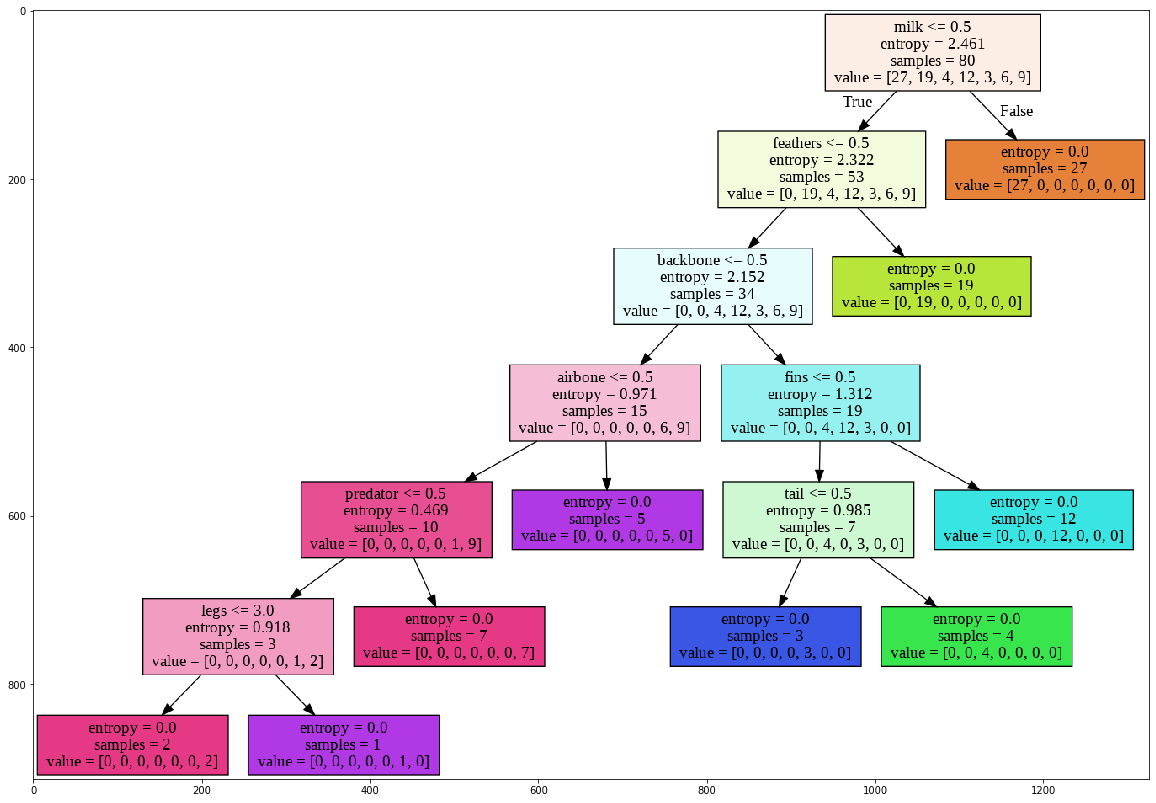

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(plt.imread(save_png))
plt.show()

Linear Classifier

In [0]:
from sklearn import linear_model
linear_classifier = linear_model.SGDClassifier()

In [37]:
linear_classifier.fit(training_data[:,:16],training_data[:,16])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
pred = linear_classifier.predict(testing_data[:,:16])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_data[:,16], pred)

0.9047619047619048